In [20]:
import sys
sys.path.append('../src')

from module.module import Linear, Conv1D, MaxPool1D, Flatten
from module.activation import TanH, Sigmoide, ReLU

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.processing import one_hot_y
from utils.plots import plot_net, classification_report

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [3]:
X = data["X_train"]
y = data["Y_train"]

X_test = data["X_test"]
y_test = data["Y_test"]

In [4]:
classes = len(np.unique(y))

input_neurons = X.shape[1]
output_neurons = classes

In [5]:
y_one_hot = one_hot_y(y, classes)

In [6]:
y_one_hot.shape

(6229, 10)

In [7]:
X_conv = X[:,:,np.newaxis]

In [8]:
X_conv.shape

(6229, 256, 1)

100%|██████████| 500/500 [45:56<00:00,  5.51s/it]


Training completed.


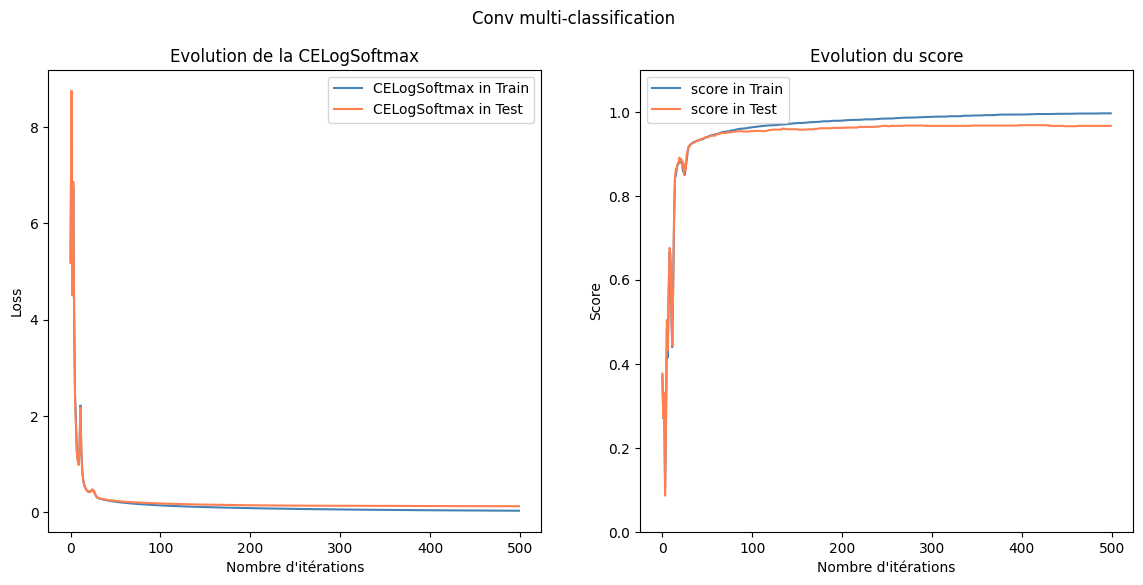

In [9]:
net_500_ep = Sequentiel([
    Conv1D(k_size=3, chan_in=1, chan_out=32, stride=1, init="he"),
    MaxPool1D(2, 2),
    Flatten(),
    Linear(4064, 100, init="he"),
    ReLU(),
    Linear(100, 10, init="he"),
], classes_type="multi")

optim_500_ep = Optim(net_500_ep, CELogSoftmax(), eps=1e-5)
optim_500_ep.SGD(X_conv, y_one_hot, test_train_split=True, batch_size=len(X_conv), epochs=500, verbose=False)

plot_net(optim_500_ep, X_conv, y_one_hot, net_type="multiclass", net_title="Conv multi-classification")

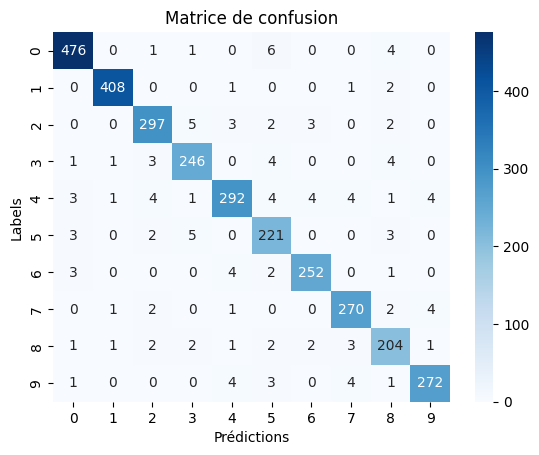

In [26]:
y_test_hat = net_500_ep.predict(X_test[:,:,np.newaxis]).reshape(-1)
df = classification_report(y_test_hat, y_test, [f"{i}" for i in range(10)])

In [27]:
print(df)

          precision    recall  f1-score  support
class                                           
0          0.975410   0.97541   0.97541      488
1          0.990291  0.990291  0.990291      412
2          0.954984  0.951923  0.953451      312
3          0.946154  0.949807  0.947977      259
4          0.954248  0.918239  0.935897      318
5          0.905738  0.944444  0.924686      234
6          0.965517  0.961832  0.963671      262
7          0.957447  0.964286  0.960854      280
8          0.910714  0.931507  0.920993      219
9          0.967972  0.954386  0.961131      285
accuracy   0.957315                         3069


100%|██████████| 150/150 [15:08<00:00,  6.06s/it]


Training completed.


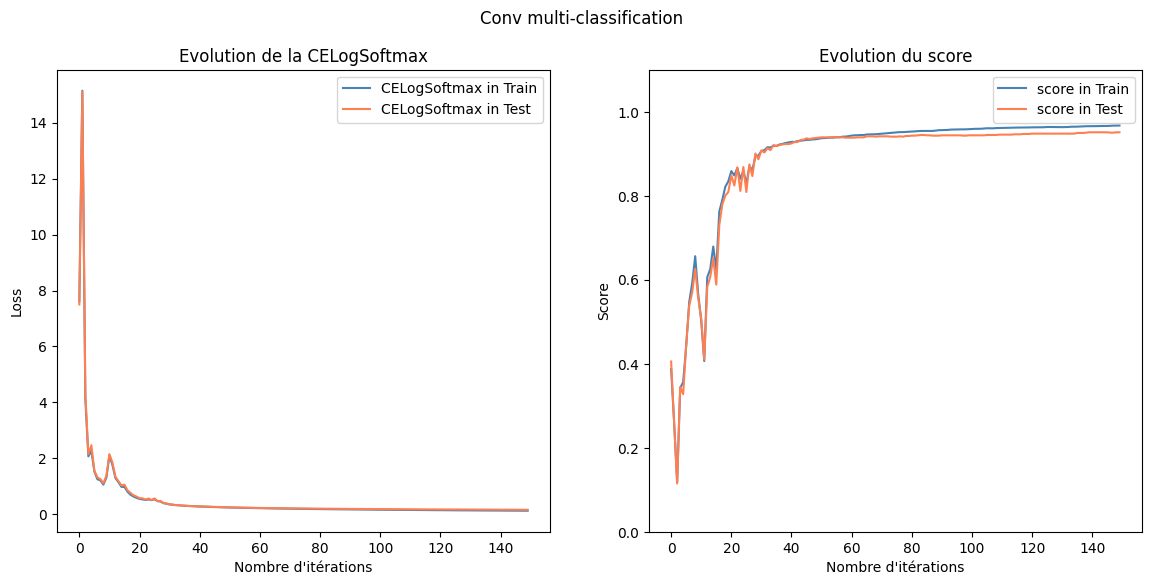

In [13]:
net_150_ep = Sequentiel([
    Conv1D(k_size=3, chan_in=1, chan_out=32, stride=1, init="he"),
    MaxPool1D(2, 2),
    Flatten(),
    Linear(4064, 100, init="he"),
    ReLU(),
    Linear(100, 10, init="he"),
], classes_type="multi")

optim_150_ep = Optim(net_150_ep, CELogSoftmax(), eps=1e-5)
optim_150_ep.SGD(X_conv, y_one_hot, test_train_split=True, batch_size=len(X), epochs=150, verbose=False)

plot_net(optim_150_ep, X_conv, y_one_hot, net_type="multiclass", net_title="Conv multi-classification")

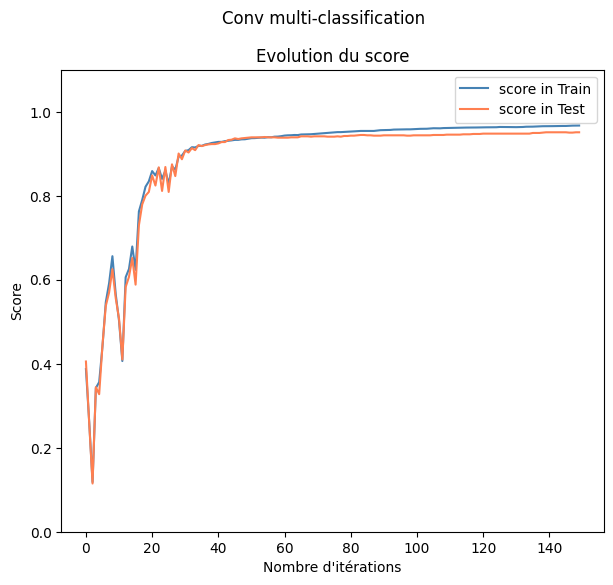

In [30]:
plot_net(optim_150_ep, X_conv, y_one_hot, net_type="multiclass", net_title="Conv multi-classification", display_loss=False)